<a href="https://colab.research.google.com/github/pachterlab/CP_2022/blob/main/notebooks/swissRoll/swissDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn

!pip3 install --quiet umap-learn

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.7 MB/s 


In [3]:
import pandas as pd
import numpy as np


import random

import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

import time

import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline

sns.set_style('white')

In [39]:
#Generate random points and one set of equidistant points

from numpy import random 

#https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/datasets/samples_generator.py#L1321

n_samples = 10000
noise=0

sml = .005
a = 1
height =   0.866025 #73205

t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
t= np.append(t,np.array([10,10+a,10+(a/2)]))
t = np.reshape(t, (1,n_samples+3))

x = t * np.cos(4*t)

y = 21 * np.random.rand(1, n_samples)
y = np.append(y,np.array([10,10,10+height]))
y = np.reshape(y, (1,n_samples+3))

y = y

z = t * np.sin(4*t)

X = np.concatenate((x, y, z))
X += noise * np.random.randn(3, n_samples+3)
X = X.T
t = np.squeeze(t)




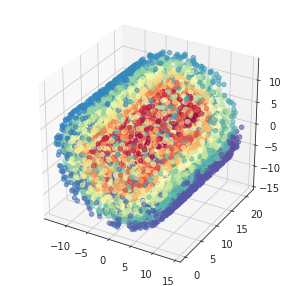

In [40]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0],X[:,1],X[:,2], c=t, cmap=plt.cm.Spectral,alpha=0.6)

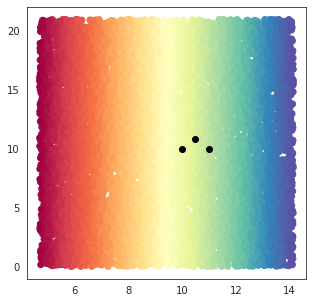

In [26]:
fig = plt.figure(figsize=(5,5))
plt.scatter(np.reshape(t, (1,n_samples+3)),y,c=t, cmap=plt.cm.Spectral,)
plt.scatter(t[-3:],y[0,-3:], c='black')

#Scale axes here

In [14]:
from sklearn.metrics import pairwise_distances
pairwise_distances(np.array([[10.,10.], [10+a,10.], [10+(a/2),10+height]])) #Check equidistance 10,10+a,10+(a/2)

array([[0.        , 1.        , 0.99999965],
       [1.        , 0.        , 0.99999965],
       [0.99999965, 0.99999965, 0.        ]])

In [41]:
#Get umap embedding
reducer = umap.UMAP(n_components = 2, random_state = 42, n_neighbors=30)

umap2d = reducer.fit_transform(X)
umap2d.shape

(10003, 2)

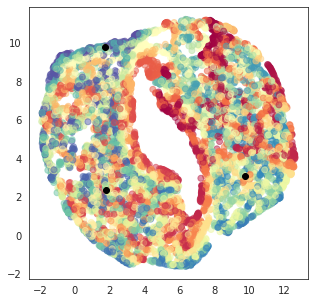

In [42]:
fig = plt.figure(figsize=(5,5))
plt.scatter(umap2d[:,0],umap2d[:,1], c=t, cmap=plt.cm.Spectral,alpha=0.5)
plt.scatter(umap2d[-3:,0],umap2d[-3:,1], c='black')

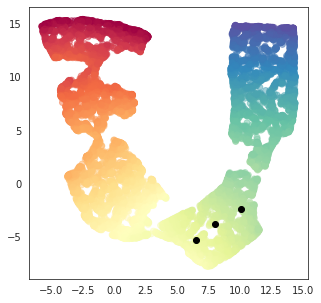

In [16]:
#Tighter swiss roll with shorter distances between spirals
fig = plt.figure(figsize=(5,5))
plt.scatter(umap2d[:,0],umap2d[:,1], c=t, cmap=plt.cm.Spectral,alpha=0.5)
plt.scatter(umap2d[-3:,0],umap2d[-3:,1], c='black')

In [43]:
pairwise_distances(np.array([[umap2d[-3,0],umap2d[-3,1]], 
                             [umap2d[-2,0],umap2d[-2,1]], 
                             [umap2d[-1,0],umap2d[-1,1]]])) #Check equidistance

array([[ 0.       , 10.434432 ,  7.9932055],
       [10.434432 ,  0.       ,  7.414438 ],
       [ 7.9932055,  7.414438 ,  0.       ]], dtype=float32)


Calculate distances of equidistant points in UMAP

Grid of tightness and n_neighbors

In [ ]:
#Even if euclidean is 'correct' as in PCA then shouldn't distort 

#Even in simple example of swiss roll equid distorted (in both directions) --> appearances
#If umap cannot work on simple example, then how much can trust 'manifold' reconstruction
#Also did equidistance in cell type, treated as homogeneous ball (unlikely to be 'swiss roll')
#Need baseline to measure distortion so equidistance provides baseline

#note that we don't add 'noise'